In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Join

In [35]:
df1 = pd.DataFrame({
    "Roll No": [ 1001,1003,1005,1009,1002,1111,1234],
    "Name":['A','C','E','I','B','X','Y'],
    "Marks":[80,70,75,65,95,90,80]
})

In [36]:
df1

,Roll No,Name,Marks
0,1001,A,80
1,1003,C,70
2,1005,E,75
3,1009,I,65
4,1002,B,95
5,1111,X,90
6,1234,Y,80


In [37]:
df1.rename(lambda name: name.strip().lower(),axis =1,inplace=True )

In [38]:
df1

,roll no,name,marks
0,1001,A,80
1,1003,C,70
2,1005,E,75
3,1009,I,65
4,1002,B,95
5,1111,X,90
6,1234,Y,80


In [39]:
df2 = pd.DataFrame({
    "Roll No": [1004,1003,1007,1002,1001,1008,1005],
    "Sports": ["cricket","football","cricket","Kabaddi","Football","Cricket","kabaddi"],
    "skill": ["expert","intermediate","expert","beginner","beginner","expert","intermediate"]
})

In [40]:
df2.rename(lambda name: name.strip().lower(),inplace = True, axis =1 )

In [41]:
df2

,roll no,sports,skill
0,1004,cricket,expert
1,1003,football,intermediate
2,1007,cricket,expert
3,1002,Kabaddi,beginner
4,1001,Football,beginner
5,1008,Cricket,expert
6,1005,kabaddi,intermediate


In [42]:
df2["sports"].str.lower()

0     cricket
1    football
2     cricket
3     kabaddi
4    football
5     cricket
6     kabaddi
Name: sports, dtype: object

In [43]:
df2["sports"] = df2["sports"].apply(lambda v:v.strip().lower())

In [44]:
df2

,roll no,sports,skill
0,1004,cricket,expert
1,1003,football,intermediate
2,1007,cricket,expert
3,1002,kabaddi,beginner
4,1001,football,beginner
5,1008,cricket,expert
6,1005,kabaddi,intermediate


In [45]:
y = df2.set_index("roll no")

In [46]:
y

,sports,skill
roll no,,
1004,cricket,expert
1003,football,intermediate
1007,cricket,expert
1002,kabaddi,beginner
1001,football,beginner
1008,cricket,expert
1005,kabaddi,intermediate


In [47]:
x = df1.set_index("roll no")
x

,name,marks
roll no,,
1001,A,80
1003,C,70
1005,E,75
1009,I,65
1002,B,95
1111,X,90
1234,Y,80


In [48]:
z = pd.concat((x,y),join = 'inner',axis=1)
z

,name,marks,sports,skill
roll no,,,,
1001,A,80,football,beginner
1003,C,70,football,intermediate
1005,E,75,kabaddi,intermediate
1002,B,95,kabaddi,beginner


In [49]:
z = pd.concat((x,y),join = 'outer',axis=1)
z

,name,marks,sports,skill
roll no,,,,
1001,A,80.0,football,beginner
1003,C,70.0,football,intermediate
1005,E,75.0,kabaddi,intermediate
1009,I,65.0,NaN,NaN
1002,B,95.0,kabaddi,beginner
1111,X,90.0,NaN,NaN
1234,Y,80.0,NaN,NaN
1004,NaN,NaN,cricket,expert
1007,NaN,NaN,cricket,expert


In [50]:
df1

,roll no,name,marks
0,1001,A,80
1,1003,C,70
2,1005,E,75
3,1009,I,65
4,1002,B,95
5,1111,X,90
6,1234,Y,80


In [51]:
df2

,roll no,sports,skill
0,1004,cricket,expert
1,1003,football,intermediate
2,1007,cricket,expert
3,1002,kabaddi,beginner
4,1001,football,beginner
5,1008,cricket,expert
6,1005,kabaddi,intermediate


In [52]:
df = pd.merge(df1,df2, on="roll no")  # how = 'inner'
df

,roll no,name,marks,sports,skill
0,1001,A,80,football,beginner
1,1003,C,70,football,intermediate
2,1005,E,75,kabaddi,intermediate
3,1002,B,95,kabaddi,beginner


In [53]:
pd.merge(x,y,on='roll no')

,name,marks,sports,skill
roll no,,,,
1001,A,80,football,beginner
1003,C,70,football,intermediate
1005,E,75,kabaddi,intermediate
1002,B,95,kabaddi,beginner


In [54]:
df = pd.merge(df1,df2,on = 'roll no',how = 'outer')
df

,roll no,name,marks,sports,skill
0,1001,A,80.0,football,beginner
1,1003,C,70.0,football,intermediate
2,1005,E,75.0,kabaddi,intermediate
3,1009,I,65.0,NaN,NaN
4,1002,B,95.0,kabaddi,beginner
5,1111,X,90.0,NaN,NaN
6,1234,Y,80.0,NaN,NaN
7,1004,NaN,NaN,cricket,expert
8,1007,NaN,NaN,cricket,expert
9,1008,NaN,NaN,cricket,expert


In [55]:
df2.rename({"roll no":"id"},axis=1,inplace=True)

In [56]:
df = pd.merge(df1,df2,how='outer',left_on='roll no',right_on='id')
df

,roll no,name,marks,id,sports,skill
0,1001.0,A,80.0,1001.0,football,beginner
1,1003.0,C,70.0,1003.0,football,intermediate
2,1005.0,E,75.0,1005.0,kabaddi,intermediate
3,1009.0,I,65.0,NaN,NaN,NaN
4,1002.0,B,95.0,1002.0,kabaddi,beginner
5,1111.0,X,90.0,NaN,NaN,NaN
6,1234.0,Y,80.0,NaN,NaN,NaN
7,NaN,NaN,NaN,1004.0,cricket,expert
8,NaN,NaN,NaN,1007.0,cricket,expert
9,NaN,NaN,NaN,1008.0,cricket,expert


In [57]:
df = pd.merge(df1,df2,left_on='roll no',right_on = 'id',how='inner').drop('id',axis=1)
df

,roll no,name,marks,sports,skill
0,1001,A,80,football,beginner
1,1003,C,70,football,intermediate
2,1005,E,75,kabaddi,intermediate
3,1002,B,95,kabaddi,beginner


In [58]:
df.pivot_table(index="sports",values="marks",aggfunc="mean")
#aggfunc applies upon values

,marks
sports,
football,75.0
kabaddi,85.0


In [59]:
print(*sns.get_dataset_names(),sep="\t")

anagrams	anscombe	attention	brain_networks	car_crashes	diamonds	dots	dowjones	exercise	flights	fmri	geyser	glue	healthexp	iris	mpg	penguins	planets	seaice	taxis	tips	titanic	anagrams	anagrams	anscombe	anscombe	attention	attention	brain_networks	brain_networks	car_crashes	car_crashes	diamonds	diamonds	dots	dots	dowjones	dowjones	exercise	exercise	flights	flights	fmri	fmri	geyser	geyser	glue	glue	healthexp	healthexp	iris	iris	mpg	mpg	penguins	penguins	planets	planets	seaice	seaice	taxis	taxis	tips	tips	titanic	titanic	anagrams	anscombe	attention	brain_networks	car_crashes	diamonds	dots	dowjones	exercise	flights	fmri	geyser	glue	healthexp	iris	mpg	penguins	planets	seaice	taxis	tips	titanic


In [60]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic',
 'anagrams',
 'anagrams',
 'anscombe',
 'anscombe',
 'attention',
 'attention',
 'brain_networks',
 'brain_networks',
 'car_crashes',
 'car_crashes',
 'diamonds',
 'diamonds',
 'dots',
 'dots',
 'dowjones',
 'dowjones',
 'exercise',
 'exercise',
 'flights',
 'flights',
 'fmri',
 'fmri',
 'geyser',
 'geyser',
 'glue',
 'glue',
 'healthexp',
 'healthexp',
 'iris',
 'iris',
 'mpg',
 'mpg',
 'penguins',
 'penguins',
 'planets',
 'planets',
 'seaice',
 'seaice',
 'taxis',
 'taxis',
 'tips',
 'tips',
 'titanic',
 'titanic',
 'anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'plan

In [61]:
i=0
for name in sns.get_dataset_names():
    if i%4 == 0:
        print()
        print("_"*85)
        print(end='\n|')
    print(f'{name:^20}|',end="")
    i+=1


_____________________________________________________________________________________

|      anagrams      |      anscombe      |     attention      |   brain_networks   |
_____________________________________________________________________________________

|    car_crashes     |      diamonds      |        dots        |      dowjones      |
_____________________________________________________________________________________

|      exercise      |      flights       |        fmri        |       geyser       |
_____________________________________________________________________________________

|        glue        |     healthexp      |        iris        |        mpg         |
_____________________________________________________________________________________

|      penguins      |      planets       |       seaice       |       taxis        |
_____________________________________________________________________________________

|        tips        |      titanic       |    

In [62]:
flt = sns.load_dataset("flights")

In [63]:
flt.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [65]:
flt.shape #long shape

(144, 3)

In [68]:
df = flt.pivot_table(index="year",columns="month",values="passengers")
df  #wide format

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112.0,118.0,132.0,129.0,121.0,135.0,148.0,148.0,136.0,119.0,104.0,118.0
1950,115.0,126.0,141.0,135.0,125.0,149.0,170.0,170.0,158.0,133.0,114.0,140.0
1951,145.0,150.0,178.0,163.0,172.0,178.0,199.0,199.0,184.0,162.0,146.0,166.0
1952,171.0,180.0,193.0,181.0,183.0,218.0,230.0,242.0,209.0,191.0,172.0,194.0
1953,196.0,196.0,236.0,235.0,229.0,243.0,264.0,272.0,237.0,211.0,180.0,201.0
1954,204.0,188.0,235.0,227.0,234.0,264.0,302.0,293.0,259.0,229.0,203.0,229.0
1955,242.0,233.0,267.0,269.0,270.0,315.0,364.0,347.0,312.0,274.0,237.0,278.0
1956,284.0,277.0,317.0,313.0,318.0,374.0,413.0,405.0,355.0,306.0,271.0,306.0
1957,315.0,301.0,356.0,348.0,355.0,422.0,465.0,467.0,404.0,347.0,305.0,336.0


In [71]:
df.style.background_gradient(cmap="coolwarm")

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112.000000,118.000000,132.000000,129.000000,121.000000,135.000000,148.000000,148.000000,136.000000,119.000000,104.000000,118.000000
1950,115.000000,126.000000,141.000000,135.000000,125.000000,149.000000,170.000000,170.000000,158.000000,133.000000,114.000000,140.000000
1951,145.000000,150.000000,178.000000,163.000000,172.000000,178.000000,199.000000,199.000000,184.000000,162.000000,146.000000,166.000000
1952,171.000000,180.000000,193.000000,181.000000,183.000000,218.000000,230.000000,242.000000,209.000000,191.000000,172.000000,194.000000
1953,196.000000,196.000000,236.000000,235.000000,229.000000,243.000000,264.000000,272.000000,237.000000,211.000000,180.000000,201.000000
1954,204.000000,188.000000,235.000000,227.000000,234.000000,264.000000,302.000000,293.000000,259.000000,229.000000,203.000000,229.000000
1955,242.000000,233.000000,267.000000,269.000000,270.000000,315.000000,364.000000,347.000000,312.000000,274.000000,237.000000,278.000000
1956,284.000000,277.000000,317.000000,313.000000,318.000000,374.000000,413.000000,405.000000,355.000000,306.000000,271.000000,306.000000
1957,315.000000,301.000000,356.000000,348.000000,355.000000,422.000000,465.000000,467.000000,404.000000,347.000000,305.000000,336.000000


### Data Visualization

-> graphical representation of data

-> line,scatter,boxplot,histogram,barchart,pie charts,heat map,etc.

### Anatomy of figure

![Anatomy of figure](https://matplotlib.org/stable/_images/sphx_glr_anatomy_001_2_00x.png)

In [73]:
ans = flt.groupby("year")["passengers"].mean().reset_index()
ans

,year,passengers
0,1949,126.666667
1,1950,139.666667
2,1951,170.166667
3,1952,197.000000
4,1953,225.000000
5,1954,238.916667
6,1955,284.000000
7,1956,328.250000
8,1957,368.416667
9,1958,381.000000


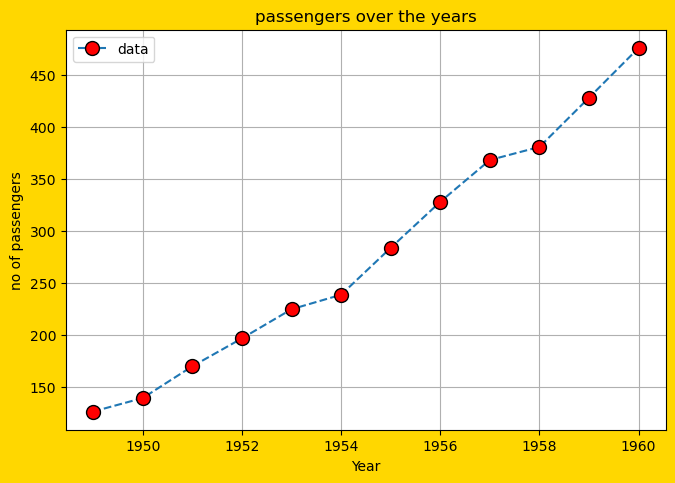

In [85]:
fig = plt.figure(figsize=(6,4),facecolor="gold")
axes = fig.add_axes([0,0,1,1])
axes.plot("year","passengers",ls='--',marker='o',mfc='red',ms=10,mec='black',data=ans,label="data")
axes.set_title("passengers over the years")
axes.set_xlabel("Year")
axes.set_ylabel("no of passengers")
axes.grid()
axes.legend()
plt.show()